In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pwd
%cd /content/drive/My Drive/Colab Notebooks/NLP

/content
/content/drive/My Drive/Colab Notebooks/NLP


In [3]:
%pip install mecab-python3
%pip install unidic-lite

     |████████████████████████████████| 488 kB 5.3 MB/s 
     |████████████████████████████████| 47.4 MB 50 kB/s 
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658836 sha256=73d9fdbac14d5b91c4039e772fc5be5609f86d5e97f61d90ba3d027dd2f884bc
  Stored in directory: /root/.cache/pip/wheels/de/69/b1/112140b599f2b13f609d485a99e357ba68df194d2079c5b1a2
Successfully built unidic-lite


#Corpus準備

In [4]:
# Reference https://www.pytry3g.com/entry/gensim-word2veReference 
#
# Wikipediaから、キーワードの記事をDownloadして、分かち書きしたデータ（コーパス）
# にして、ロードする。
#
import MeCab
import codecs
import urllib.parse as parser
import urllib.request as request
from bs4 import BeautifulSoup

tagger = MeCab.Tagger("-Owakati") # 分かち書きオブジェクト
link = "https://ja.wikipedia.org/wiki/" # Wikipediaの日本語ページ
keyword_list = ["ロボット","コンピュータ","人工知能","機械","人",]
corpus = []
#
# キーワードごとに、Wikipediaからテキストをとってきて、テキストを分かち書きして、
# リストにする
#
for word in keyword_list:
    with request.urlopen(link + parser.quote_plus(word)) as response: #WIki開いて
        html = response.read().decode('utf-8') # htmlとってきて
        #print('html\n' + html)
        soup = BeautifulSoup(html, "lxml")
        #print('soup\n' + soup)
        p_tags = soup.find_all('p')
        #print('p_tags\n' + p_tags) #<p>テキスト...</p>
        #
        # <p>ごとに、分かち書きして、リストにappendしていく
        #
        for p in p_tags:
            print(tagger.parse(p.text).strip())
            corpus.append(tagger.parse(p.text).strip())
#
# corpusをファイルpwiki.txtにサーブ
#
print("corpus size (# of paragraphs) {}".format(len(corpus)))
print("corpus samples {}".format(corpus[0:5]))
with codecs.open("pwiki.txt", "w", "utf-8") as f:
    f.write("\n".join(corpus))

ロボット （ チェコ 語 : robot ） は 、 人 の 代わり に 何 等 か の 作業 を 自律 的 に 行う 装置 、 もしくは 機械 の こと 。
主に 以下 に 大別 する こと が 可能 で ある 。
近年 で は 無人 機 「 ドローン 」 を 半ば 自律 化 さ せ た もの [ 1 ] も 存在 し 、 自動 運転 車 の 実現 が 視野 に 入っ て き て おり 、 SF の 世界 が 現実 の もの と なり つつ ある 。
生命 体 に 通常 以上 の 力 を 発揮 さ せる 方策 と し て 何 ら か の 人工 物 を 埋め込ん だり 置き換える など の 方策 を 採っ た 者 は 一般 に 「 サイボーグ 」 など と 呼ば れ 区別 さ れる こと が 多い 。
この 言葉 が 初めて 用い られ た の は 、 1920 年 に チェコスロバキア （ 当時 ） の 小説 家 カレル ・ チャペック が 発表 し た 戯曲 『 R . U . R . （ ロッサム 万能 ロボット 商会 ） 』 に おい て で ある が 、 この 作品 で は 現在 認知 さ れ て いる 金属 製 の 機械 で は なく 、 人間 と は 異なる 組成 の 肉体 と 人間 そっくり の 外見 を 持つ もの を 、 化学 的 合成 で 原形 質 を 使っ て 製作 し た もの で 、 現在 の SF で 言う バイオ ノ イド で ある 。
チェコ 語 で 強制 労働 （ もともと は 古代 教会 スラブ 語 で の 「 隷属 」 の 意 ） を 意味 する robota （ ロボッタ ） と [ 2 ]、 スロバキア 語 で 労働 者 を 意味 する robotnik （ ロボトニーク ） から 創ら れ た 造語 [ 3 ] で ある 。
着想 に は ゴーレム 伝説 が 影響 し て いる と 作者 が 述べ て おり [ 4 ][ 5 ]、 また 、 言葉 自体 も 作っ た の は 自身 で は なく 、 兄 で 画家 の ヨゼフ ・ チャペック で ある と し て いる 。 あらすじ を 兄 に 話し 、 どの よう な 名前 に し たら よい だろう か と 聞い て み た ところ 、 口 に 絵筆 を くわえ て も

In [8]:
import codecs
with codecs.open("pwiki.txt", "r", "utf-8") as f:
    corpus = f.read().split() #空白で区切り、リストへ
#print("corpus: {}".format(corpus))
vocab = set(corpus) #単語のsetを作成
print("vocab size {}, vocab: {}".format(len(vocab), vocab))
word_to_ix = {word: i for i, word in enumerate(vocab)} #辞書　単語->indexをもらう
print("word_to_ix: {}".format(word_to_ix))

vocab size 3624, vocab: {'タンパク', 'バーナーズ', 'グラス', 'Learning', '楽しま', '生活', 'クランク', '状', '広い', 'アプリケーション', '程度', '原発', '動き回っ', '点', 'ロシア', 'アプローチ', '歯車', '動か', 'ペット', '38', '実', '東京', '日常', 'カラオケ', 'DAY', '議長', 'Waymo', '短所', '青銅', '言葉', '替わり', '政府', '単位', '医学', '春秋', '事例', '質問', '倒壊', 'ビタ', '又', '鈴鹿', '2006', '使用', '評価', '2003', '運転', '官民', '179', '帽子', '変換', '合い', '保守', 'あてはめ', '運用', '拡大', '地下', '中川', '158', '受け止め', '人命', '道具', 'レース', '深層', 'ダ・ヴィンチ', '最適', '容量', '標準', '先立ち', '則', 'チャレンジ', '状態', '三宅', '宗', '結合', 'よう', '=', '野田', '減らす', ']（', 'て', '近・現代', '故', '繰り返す', '兆', '野家', 'レッテル', 'SSD', 'フランス', '小型', 'リズム', 'ヘルメット', 'エンジニア', '東北', 'Alto', '143', '風車', '識別', 'もう', 'インテリジェンス', 'VxWorks', '揮発', 'SyNAPSE', 'ニューラリンク', '見る', '比較', '盛ん', '初心', 'マーク', '江戸', 'ブレイン', '34', '多数', 'ユーザー', 'ボルト', '違い', '」', '目的', '波紋', '増やし', '本物', 'なおかつ', 'ピチャイ', '知', '複合', '通信', '結論', '109', '欧米', '認め', 'オペレーティング', '力', 'ELIZA', '64', '中国', '1807', '？', 'ジョセフ', 'ショット', '五', '公言', '識者', '死者', '突破', 'わけ', '長い'

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# torch.manual_seed でググる
torch.manual_seed(1) #乱数のシードを設定して、結果が安定するようにする。
EMBEDDING_DIM = 16

def comp(embeds,w1,w2):
  embed1 = embeds(torch.tensor([word_to_ix[w1]]))
  embed2 = embeds(torch.tensor([word_to_ix[w2]]))
  cos = nn.CosineSimilarity(dim=1)
  s = cos(embed1, embed2)
  #print('cosine similarity {}'.format(s))
  return s.detach().item() #detach->PyTorchの付加情報を削除、item->値を取り出す

#CBOWの原理

[(['ロボット', '（', '語', ':'], 'チェコ'), (['（', 'チェコ', ':', 'robot'], '語'), (['チェコ', '語', 'robot', '）'], ':'), (['語', ':', '）', 'は'], 'robot')]
epoch 0: total loss 129538.58072516159
epoch 1: total loss 110793.20753278537
epoch 2: total loss 100510.00615475862
epoch 3: total loss 92840.30403822148
epoch 4: total loss 86814.49393373527
epoch 5: total loss 81927.57097005108
epoch 6: total loss 77890.79138436682
epoch 7: total loss 74503.2705773178
epoch 8: total loss 71627.39458215961
epoch 9: total loss 69169.77816721413


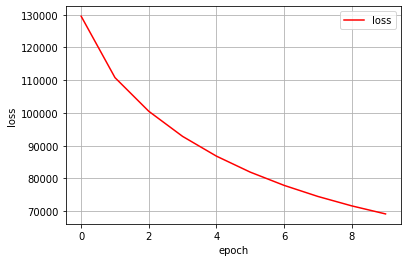

In [9]:
# Reference https://discuss.pytorch.org/t/nlp-in-pytorch-tutorial/883/16

#
#コーパスの単語の前後2単語をコンテキストとし、中心単語とタプルを作り、全部をリストにする
#
cbow_data = []
for i in range(2, len(corpus) - 2): 
    context = [corpus[i - 2], corpus[i - 1], corpus[i + 1], corpus[i + 2]]
    target = corpus[i]
    cbow_data.append((context, target))
print(cbow_data[:4])

class CBOW(nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(CBOW, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        initrange = 0.5 / EMBEDDING_DIM
        self.embeddings.weight.data.uniform_(-initrange, initrange)
        self.linear = nn.Linear(embedding_dim, vocab_size) #入力は埋め込み要素数ベクトル、出力は語彙数ベクトル
        nn.init.uniform_(self.linear.weight, -initrange, initrange)
        self.linear.bias.data.zero_()

    def forward(self, inputs):
        # コンテキスト4単語のidを受けて、埋め込み表から埋め込みベクトル取り出して、ベクトルの要素ごとの和を求める 
        embedding = self.embeddings(inputs).sum(dim=0).view((1, -1))  
        out = self.linear(embedding)
        out = F.log_softmax(out, dim=1)
        return out

num_epochs = 10
loss_function = nn.NLLLoss()
cbow = CBOW(len(vocab), EMBEDDING_DIM, 4)
optimizer = optim.SGD(cbow.parameters(), lr=0.1)
loss_list = []

for epoch in range(num_epochs):
    total_loss = 0
    for context, target in cbow_data:
        context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)
        cbow.zero_grad()
        log_probs = cbow(context_idxs)
        loss = loss_function(log_probs, torch.tensor([word_to_ix[target]], dtype=torch.long))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print('epoch {}: total loss {}'.format(epoch, total_loss))
    loss_list.append(total_loss)

plt.figure()
plt.plot(range(int(num_epochs)), loss_list, 'r-', label='loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.show(block=False)

In [10]:
print('cos similarity b/w 人, ロボット -> {}'.format(comp(cbow.embeddings,'人','ロボット')))
print('cos similarity b/w 人, 機械 -> {}'.format(comp(cbow.embeddings,'人', '機械')))
print('cos similarity b/w 人, コンピュータ -> {}'.format(comp(cbow.embeddings,'人', 'コンピュータ')))
print('cos similarity b/w ロボット, 機械 -> {}'.format(comp(cbow.embeddings,'ロボット', '機械')))
print('cos similarity b/w 機械, コンピュータ -> {}'.format(comp(cbow.embeddings,'機械', 'コンピュータ')))

cos similarity b/w 人, ロボット -> 0.26236221194267273
cos similarity b/w 人, 機械 -> 0.18097306787967682
cos similarity b/w 人, コンピュータ -> -0.10674210637807846
cos similarity b/w ロボット, 機械 -> 0.43125098943710327
cos similarity b/w 機械, コンピュータ -> 0.011390105821192265


#SkipGramの原理

[('チェコ', 'ロボット'), ('チェコ', '（'), ('チェコ', '語'), ('チェコ', ':')]
epoch 0: total loss 532210.32417202
epoch 1: total loss 503472.4323654473
epoch 2: total loss 486552.63276055455
epoch 3: total loss 474284.0472929776
epoch 4: total loss 464870.5767352581
epoch 5: total loss 457456.42574331164
epoch 6: total loss 451515.8551994264
epoch 7: total loss 446714.3442494869
epoch 8: total loss 442829.7754936218
epoch 9: total loss 439713.4927421212
epoch 10: total loss 437246.3892942667
epoch 11: total loss 435314.9338967502
epoch 12: total loss 433817.32336199284
epoch 13: total loss 432663.96818190813
epoch 14: total loss 431778.45666095614
epoch 15: total loss 431098.01283696294
epoch 16: total loss 430572.8034045994
epoch 17: total loss 430164.317368567
epoch 18: total loss 429843.47136068344
epoch 19: total loss 429588.513825655


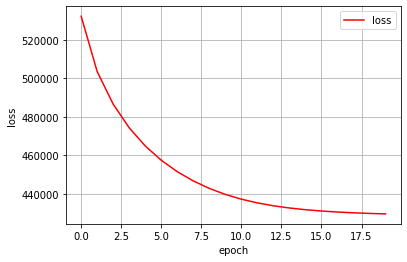

In [11]:
# 中心単語と、コンテキストの1単語のペアを作りタプルにし、それら全部をリストにする
skipgram_data = []
for i in range(2, len(corpus) - 4):
    center = corpus[i]
    skipgram_data.append((center, corpus[i-2]))
    skipgram_data.append((center, corpus[i-1]))
    skipgram_data.append((center, corpus[i+1]))
    skipgram_data.append((center, corpus[i+2]))
print(skipgram_data[:4])

class SKIPGRAM(nn.Module):

    def __init__(self, vocab_size, embedding_dim):
        super(SKIPGRAM, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        initrange = 0.5 / embedding_dim
        self.embeddings.weight.data.uniform_(-initrange, initrange)
        self.linear = nn.Linear(embedding_dim, vocab_size)
        nn.init.uniform_(self.linear.weight, -initrange, initrange)
        self.linear.bias.data.zero_()

    def forward(self, center_id):
        embed = self.embeddings(center_id)
        out = self.linear(embed)
        out = F.log_softmax(out, dim=1)
        return out

num_epochs = 20
loss_function = nn.NLLLoss()
skipgram = SKIPGRAM(len(vocab), EMBEDDING_DIM)
optimizer = optim.SGD(skipgram.parameters(), lr=0.1)
loss_list = []

for epoch in range(num_epochs):
    total_loss = 0
    for center, context in skipgram_data:
        center_id = torch.tensor([word_to_ix[center]], dtype=torch.long)
        context_id = torch.tensor([word_to_ix[context]], dtype=torch.long)
        skipgram.zero_grad()
        log_probs = skipgram(center_id)
        loss = loss_function(log_probs, torch.tensor([word_to_ix[context]], dtype=torch.long))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print('epoch {}: total loss {}'.format(epoch, total_loss))
    loss_list.append(total_loss)
  
plt.figure()
plt.plot(range(int(num_epochs)), loss_list, 'r-', label='loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.show(block=False)

In [12]:
print('cos similarity b/w 人, ロボット -> {}'.format(comp(skipgram.embeddings,'人','ロボット')))
print('cos similarity b/w 人, 機械 -> {}'.format(comp(skipgram.embeddings,'人', '機械')))
print('cos similarity b/w 人, コンピュータ -> {}'.format(comp(skipgram.embeddings,'人', 'コンピュータ')))
print('cos similarity b/w ロボット, 機械 -> {}'.format(comp(skipgram.embeddings,'ロボット', '機械')))
print('cos similarity b/w 機械, コンピュータ -> {}'.format(comp(skipgram.embeddings,'機械', 'コンピュータ')))

cos similarity b/w 人, ロボット -> 0.08943267911672592
cos similarity b/w 人, 機械 -> -0.28911781311035156
cos similarity b/w 人, コンピュータ -> -0.20352290570735931
cos similarity b/w ロボット, 機械 -> 0.6243879795074463
cos similarity b/w 機械, コンピュータ -> 0.2973698675632477


#NegativeSamplingの原理

[('チェコ', 'ロボット'), ('チェコ', '（'), ('チェコ', '語'), ('チェコ', ':'), ('語', '（')]
epoch 0: total loss 87509.19828437641
epoch 1: total loss 67793.32745853812
epoch 2: total loss 59928.51707148028
epoch 3: total loss 51802.23616331723
epoch 4: total loss 43440.07433124402
epoch 5: total loss 36404.0914898506
epoch 6: total loss 31289.681773445867
epoch 7: total loss 27264.848797342704
epoch 8: total loss 23406.9730697747
epoch 9: total loss 20385.640087752545
epoch 10: total loss 17797.94638975502
epoch 11: total loss 15618.056384695426
epoch 12: total loss 13823.423190510082
epoch 13: total loss 12284.335375774182
epoch 14: total loss 11185.103046258871
epoch 15: total loss 9834.160053997255
epoch 16: total loss 9121.712838250474
epoch 17: total loss 8487.180062428613
epoch 18: total loss 7859.750764173237
epoch 19: total loss 7327.7377832023685


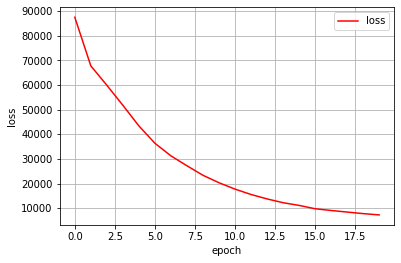

In [13]:
# simplified version of the followings (no data loader, no mini-batch):
# http://mathshingo.chillout.jp/blog19.html
# https://github.com/theeluwin/pytorch-sgns/blob/master/model.py

#+
#コーパスの単語すべて(最初２単語と最後の2単語は除く)に関して、 その単語と周囲の4単語のそれぞれをペアにして、リストにしておく
#-
skipgram_data = []
for i in range(2, len(corpus) - 4):
    center = corpus[i]
    skipgram_data.append((center, corpus[i-2]))
    skipgram_data.append((center, corpus[i-1]))
    skipgram_data.append((center, corpus[i+1]))
    skipgram_data.append((center, corpus[i+2]))
print(skipgram_data[:5])

import random

class SKIPGRAM_NS(nn.Module):

    def __init__(self, vocab_size, embedding_dim):
        super(SKIPGRAM_NS, self).__init__() #スーパークラスのコンストラクターを呼ぶ
        self.ctr_embeddings = nn.Embedding(vocab_size, embedding_dim) #中心語用の埋め込み表
        initrange = 0.5 / embedding_dim
        self.ctr_embeddings.weight.data.uniform_(-initrange, initrange) #埋め込み表の初期化
        self.ctx_embeddings = nn.Embedding(vocab_size, embedding_dim) #周囲の単語用の埋め込み表
        self.ctx_embeddings.weight.data.uniform_(-initrange, initrange) #埋め込み表の初期化

    def forward(self, center_id, context_id, negative_ids):
        #+
        #softmaxを使う場合は、中心語の埋め込みベクトルを全結合に通して、
        #語彙サイズにクラス分けして周辺単語の確率にしていた
        #   embed = self.embeddings(center_id)
        #   out = self.linear(embed)
        #   out = F.log_softmax(out, dim=1)
        #ここでは、中心語ID、周辺語ID、周辺にない単語IDの5個のリストをもらって、それぞれ sigmoidに通し、
        # 周辺語との相性がいい、周辺にない単語との相性がわるい、ようにロスを返す。
        #-

        #+
        # まず周辺語との相性
        #-
        ctr_embed = self.ctr_embeddings(center_id) #中心語の埋め込みベクトルを取り出す
        ctx_embed = self.ctx_embeddings(context_id) #周囲語の埋め込みベクトルを取り出す
        positive_score = torch.dot(ctr_embed.squeeze(), ctx_embed.squeeze()) #内積で相性を量化する。　　
        positive_score = F.logsigmoid(positive_score) #sigmoidで相性確率[0..1]（対数をとると[-無限大,0]）を求める。
        
        #+
        #周囲語ではない単語を5個内積とって相性を見る。相性は小さいほど良い。
        #-
        negative_score = 0
        for i in range(5):
          neg_embed = self.ctx_embeddings(negative_ids[i])
          negative_score += torch.dot(ctr_embed.squeeze(), neg_embed.squeeze()) #内積で相性を量化する。　
        negative_score /= 5 #周辺語のスコアと重みづけをそろえるため、相性の平均をとる
        negative_score = F.logsigmoid(-negative_score) #スコアの大小を逆にして[0..1]（対数をとると[-無限大,0]）にする。
        return -(positive_score + negative_score) #sigmoidが0に近い（対数とればー無限大）ほど、ロス大きいとしたいので、符号を変える

num_epochs = 20
skipgram_ns = SKIPGRAM_NS(len(vocab), EMBEDDING_DIM)
optimizer = optim.SGD(skipgram_ns.parameters(), lr=0.1)
loss_list = []

for epoch in range(num_epochs):
    total_loss = 0
    for center, context in skipgram_data:
        center_id = torch.tensor([word_to_ix[center]], dtype=torch.long) #中心語のIDをテンソル形式にする
        context_id = torch.tensor([word_to_ix[context]], dtype=torch.long) #周囲語のIDをテンソル形式にする
        #周囲語ではない単語をサンプリングする。ランダムに選んでいるが、本当は頻度の高い、かつ周囲語以外を選ぶ。
        negative_ids =torch.tensor([random.randint(0,len(vocab)-1) for i in range(5)], dtype=torch.long)
        skipgram_ns.zero_grad() #勾配初期化
        loss = skipgram_ns(center_id, context_id, negative_ids) #中心語ID、周辺語ID、周辺にない単語IDの5個のリストを、モデルに通す
        loss.backward() #逆伝播
        optimizer.step() #学習rateを低減
        total_loss += loss.item()
    print('epoch {}: total loss {}'.format(epoch, total_loss))
    loss_list.append(total_loss)

plt.figure()
plt.plot(range(int(num_epochs)), loss_list, 'r-', label='loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.show(block=False)


In [ ]:
print('cos similarity b/w 人, ロボット -> {}'.format(comp(skipgram_ns.ctr_embeddings,'人','ロボット')))
print('cos similarity b/w 人, 機械 -> {}'.format(comp(skipgram_ns.ctr_embeddings,'人', '機械')))
print('cos similarity b/w 人, コンピュータ -> {}'.format(comp(skipgram_ns.ctr_embeddings,'人', 'コンピュータ')))
print('cos similarity b/w ロボット, 機械 -> {}'.format(comp(skipgram_ns.ctr_embeddings,'ロボット', '機械')))
print('cos similarity b/w 機械, コンピュータ -> {}'.format(comp(skipgram_ns.ctr_embeddings,'機械', 'コンピュータ')))

cos similarity b/w 人, ロボット -> -0.027669021859765053
cos similarity b/w 人, 機械 -> 0.3773837685585022
cos similarity b/w 人, コンピュータ -> 0.45574772357940674
cos similarity b/w ロボット, 機械 -> 0.14921507239341736
cos similarity b/w 機械, コンピュータ -> 0.47206029295921326
